# Data Analysis Tech Degree Unit 6: Graphing Video Game Sales

You’re reviewing sales for the top 100 video games from the years 2000-2015 to gather insights. Use Python’s Pandas, Matplotlib, and Seaborn libraries to interact with the data and create graphs.


## Importing libraries 
``` python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

```

In [6]:

import sys

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


%matplotlib inline

In [7]:
video_games_info=pd.read_csv('top100videogamesales.csv')
video_games_info





,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Big Brain Academy,Nintendo,2005,Misc,Nintendo,1.67,2.78,1.60,0.62,6.67
96,97,Red Dead Redemption,PlayStation,2010,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60
97,98,FIFA 15,PlayStation,2014,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
98,99,Donkey Kong Country Returns,Nintendo,2010,Platform,Nintendo,3.25,1.84,1.03,0.47,6.59


## Meets Expectations

###  1. Question 1: 
    A line chart shows the total global sales for each year.
    The result of the chart is explained in markdown.


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


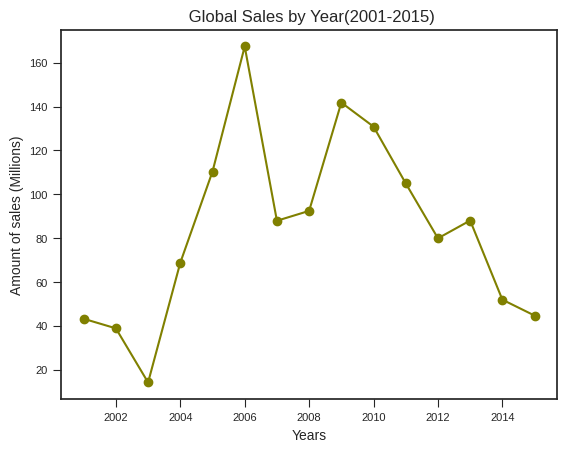

In [8]:
# let's select 2  columns, year and total global sales
yearly_sales=video_games_info[['Year','Global_Sales']]
grouped_sales=yearly_sales.groupby('Year')

sum_of_sales=grouped_sales.sum()


list_of_years=[]
list_of_sales=[]

   
for year, sale in sum_of_sales.iterrows():
   
    list_of_years.append(year)
    list_of_sales.append(sale)



  
plt.title(' Global Sales by Year(2001-2015)')
print(plt.style.available)
plt.style.use(['seaborn-v0_8-ticks'])

plt.xlabel('Years')
plt.ylabel('Amount of sales (Millions)')



plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.xticks([2001,2002,2003,2004,2005,2006, 2007,2008,2009,2010, 2011,2012,2013,2014,2015], rotation=45)
#plt.yticks([14.15,38.83,43.2,44.66,51.91,68.77,79.91,87.92,88.03,92.42,104.97,110.36,130.86,141.83,167.44])


plt.plot(list_of_years, list_of_sales, marker='o',color='olive')


plt.show()

### Explanation

*The years with the most video games sales are 
*
*


### 2.  Question 2
    A histogram shows the global sales distribution for games with Action as the genre.
    The result of the chart is explained in markdown.


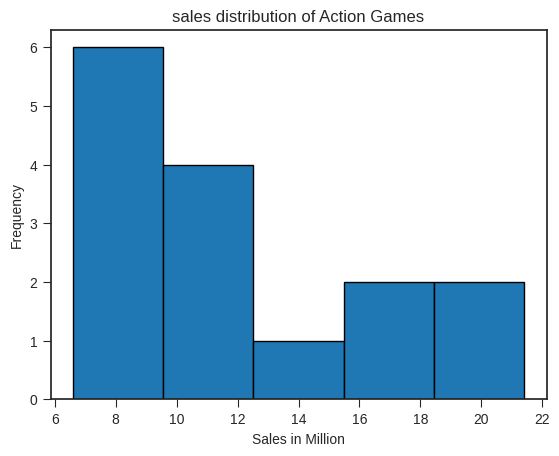

In [9]:

video_games_info.head()
action_games=video_games_info.loc[video_games_info.Genre=='Action']
grouped_by_sales=action_games['Global_Sales']


sorted_sales=grouped_by_sales.sort_values(ascending=True)
plt.title('sales distribution of Action Games')
plt.hist(sorted_sales,bins='auto',edgecolor='black')
plt.xlabel('Sales in Million')
plt.ylabel('Frequency')
plt.show()

### Explanation

### 3. Question 3:

* A pie chart shows the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart)
* A pie chart shows the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart)
    Detailed what is included in the other category.
    The differences and similarities between the North American and European charts are explained in markdown


/tmp/ipykernel_48783/2867197531.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  na_sales.append(na_sale[0])
/tmp/ipykernel_48783/2867197531.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eu_sales.append(eu_sale[0])


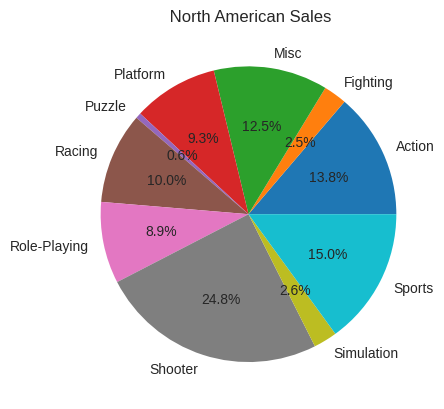

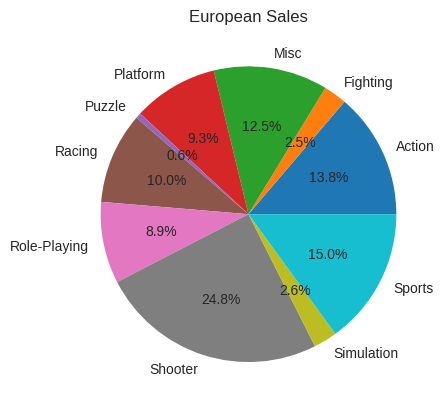

In [10]:

#North American Sales info
North_American_Sales=video_games_info[['Genre', 'NA_Sales']]
NA_Sales_group=North_American_Sales.groupby('Genre')
NA_Sales_sum=NA_Sales_group.sum()
#puzzle,fighting Simulation are the least ones
#European sales

Europen_Sales=video_games_info[['Genre','EU_Sales']]

European_Sales_group=Europen_Sales.groupby('Genre')
European_Sales_sum=European_Sales_group.sum()
#European_Sales_group=European_Sales.groupby('Genre')
European_Sales_sum=European_Sales_group.sum()

#
na_labels=[]
na_sales=[]

eu_labels=[]
eu_sales=[]


NA_Sales_group
for genre, na_sale in NA_Sales_sum.iterrows():
    na_labels.append(genre)
    na_sales.append(na_sale[0])

for eu_genre, eu_sale in NA_Sales_sum.iterrows():
    eu_labels.append(eu_genre)
    eu_sales.append(eu_sale[0])




plt.title(' North American Sales')
plt.pie(na_sales, labels=na_labels,autopct='%1.1f%%',normalize=True)
plt.show()


plt.title('European Sales')
plt.pie(eu_sales, labels=eu_labels,autopct='%1.1f%%')
#Simulation, Puzzle, Fighting 
plt.show()











